In [93]:
import xgboost as xgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [94]:
X = datasets.fetch_covtype().data[:3000]
y = datasets.fetch_covtype().target[:3000]
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_va, y_train, y_va = train_test_split(X_1, y_1)

print(X_train.shape, y_train.shape)
print(np.unique(y_train))  # 7分类任务

(2025, 54) (2025,)
[1 2 3 4 5 6 7]


In [95]:
enc = OrdinalEncoder()
y_train_enc = enc.fit_transform(y_train.reshape(-1, 1))
y_test_enc = enc.transform(y_test.reshape(-1, 1))
y_va_enc = enc.fit_transform(y_va.reshape(-1, 1))
print(np.unique(y_train_enc))
print(y_train_enc.shape)

[0. 1. 2. 3. 4. 5. 6.]
(2025, 1)


In [96]:
# label.shape = (num_sample, 1)
train_dataset = xgb.DMatrix(data=X_train, label=y_train_enc)
val_dataset = xgb.DMatrix(data=X_va, label=y_va_enc)
test_dataset = xgb.DMatrix(data=X_test)

In [97]:
params = {'objective': 'multi:softprob',
          "eval_metric": 'mlogloss',
          'num_class': 7}
eval_set = [(train_dataset, "train_"), (val_dataset, "val_")]
evals_result = {}  # 储存评估指标(内置和自定义)结果

In [98]:
from sklearn.metrics import log_loss

def my_xgb_loss(y_pred, y_true):
    """xgboost自定义验证数据集损失函数格式"""
    loss = log_loss(y_true.get_label(), y_pred)
    return 'MY_GBM_LOSS', loss

In [99]:
model = xgb.train(params=params,
                  dtrain=train_dataset,
                  # num_boost_round (int) – Number of boosting iterations.
                  # 默认num_boost_round=10
                  num_boost_round=200,
                  # List of validation sets for which metrics will evaluated during training.
                  evals=eval_set,
                  early_stopping_rounds=100,
                  evals_result=evals_result,
                  feval=my_xgb_loss,
                  )

[0]	train_-mlogloss:1.34926	train_-MY_GBM_LOSS:1.24101	val_-mlogloss:1.42636	val_-MY_GBM_LOSS:1.33523
[1]	train_-mlogloss:1.05323	train_-MY_GBM_LOSS:0.91774	val_-mlogloss:1.16724	val_-MY_GBM_LOSS:1.01577
[2]	train_-mlogloss:0.86723	train_-MY_GBM_LOSS:0.53280	val_-mlogloss:1.01195	val_-MY_GBM_LOSS:0.69385
[3]	train_-mlogloss:0.72601	train_-MY_GBM_LOSS:0.50520	val_-mlogloss:0.89399	val_-MY_GBM_LOSS:1.27419
[4]	train_-mlogloss:0.62394	train_-MY_GBM_LOSS:0.49617	val_-mlogloss:0.81265	val_-MY_GBM_LOSS:1.40222
[5]	train_-mlogloss:0.53987	train_-MY_GBM_LOSS:0.48515	val_-mlogloss:0.74967	val_-MY_GBM_LOSS:1.29945
[6]	train_-mlogloss:0.47893	train_-MY_GBM_LOSS:0.48568	val_-mlogloss:0.70060	val_-MY_GBM_LOSS:1.15668
[7]	train_-mlogloss:0.42917	train_-MY_GBM_LOSS:0.47089	val_-mlogloss:0.66250	val_-MY_GBM_LOSS:1.24472
[8]	train_-mlogloss:0.38657	train_-MY_GBM_LOSS:0.46062	val_-mlogloss:0.62633	val_-MY_GBM_LOSS:1.14149
[9]	train_-mlogloss:0.35396	train_-MY_GBM_LOSS:0.45466	val_-mlogloss:0.59873	val_-

In [100]:
# 预测结果为概率向量(多分类)
# test_dataset:The dmatrix storing the input
model.predict(test_dataset)

array([[9.65570393e-07, 5.85383668e-06, 9.99875069e-01, ...,
        1.17083869e-06, 1.04113125e-04, 6.33646664e-07],
       [3.20142172e-02, 9.66380715e-01, 1.46106831e-04, ...,
        1.18399481e-03, 7.85429584e-05, 1.08354769e-04],
       [1.14072943e-02, 9.88466978e-01, 1.55756497e-05, ...,
        7.43408918e-06, 4.89056001e-05, 3.44133587e-05],
       ...,
       [9.70963359e-01, 2.70288307e-02, 4.80231865e-05, ...,
        1.47596397e-03, 5.95505335e-05, 3.82218859e-04],
       [7.32041087e-07, 9.19208615e-05, 5.55845509e-06, ...,
        9.99897718e-01, 1.07673998e-06, 1.49774519e-06],
       [2.04521939e-02, 9.65217948e-01, 2.67757569e-04, ...,
        1.33368103e-02, 3.45981680e-04, 1.78845148e-04]], dtype=float32)

In [101]:
evals_result

{'train_': OrderedDict([('mlogloss',
               [1.349256,
                1.053226,
                0.867225,
                0.726015,
                0.623938,
                0.539867,
                0.478931,
                0.429171,
                0.386567,
                0.353963,
                0.327453,
                0.30154,
                0.27753,
                0.262032,
                0.246192,
                0.230086,
                0.213257,
                0.203677,
                0.193688,
                0.180025,
                0.172757,
                0.166374,
                0.159171,
                0.153776,
                0.146904,
                0.139747,
                0.133171,
                0.129273,
                0.123148,
                0.117793,
                0.112716,
                0.106852,
                0.102704,
                0.098149,
                0.093439,
                0.088926,
                0.085444,
   

In [102]:
evals_result['train_'].keys()

odict_keys(['mlogloss', 'MY_GBM_LOSS'])

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

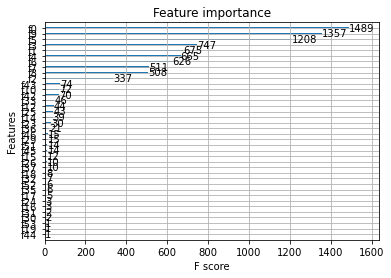

In [103]:
# 特征的相对重要性
xgb.plot_importance(model)

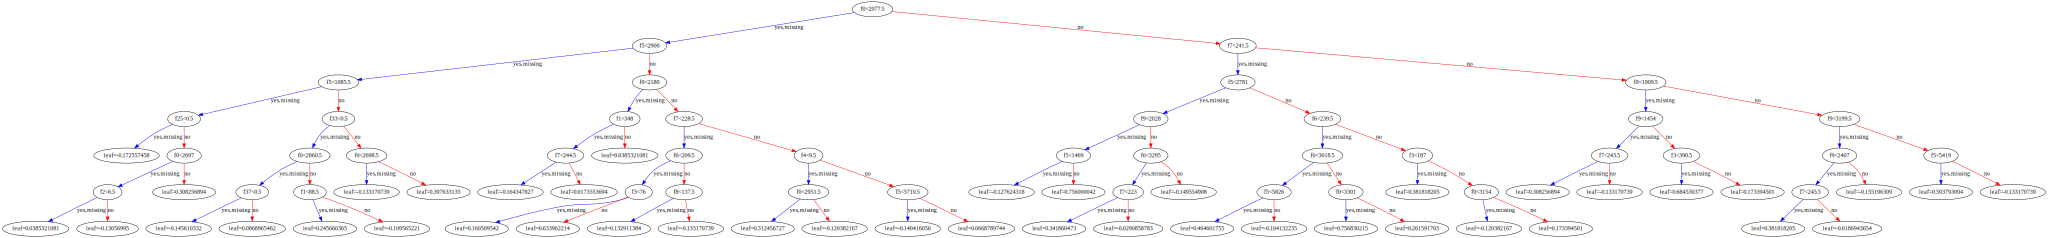

In [104]:
# 可视化lgb分割过程
img = xgb.to_graphviz(model)
img

In [105]:
# 数据类型graphviz.files.Source
type(img)




graphviz.files.Source